In [3]:
# FinRL 패키지 설치
! pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /tmp/pip-N79DgR-build
    Complete output from command python setup.py egg_info:
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-N79DgR-build/setup.py", line 1
        from __future__ import annotations
    SyntaxError: future feature annotations is not defined
    
    ----------------------------------------
Command "python setup.py egg_info" failed with error code 1 in /tmp/pip-N79DgR-build/


In [1]:
import sys
sys.path.append("../FinRL-Library")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from finrl import config
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.agents.stablebaselines3.models import DRLEnsembleAgent
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

%matplotlib inline

/home/ubuntu/anaconda3/envs/sh_rl_p37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
'''
stock_lst={'현대건설':'000720','KB금융':'105560','현대로템':'064350',
           '강원랜드':'035250','현대모비스':'012330','포스코인터내셔널':'047050',
           '현대차':'005380','한국가스공사':'036460','LG전자':'066570','SK하이닉스':'000660',
           'POSCO홀딩스':'005490','KT':'030200','LG화학':'051910', # Stock
           'KODEX인버스':'114800','KODEX200선물인버스2x':'252670'} # ETF
'''

df=pd.read_csv('./RL_project_STAR/original_df_v2.csv',index_col=0)

technical_index=['boll_low','boll_mid','boll_high','macd','macd_sig','macd_osc','rsi','rsi_sig','fast_k','slow_k','slow_d']

fe = FeatureEngineer(
                    use_technical_indicator=False,
                    #tech_indicator_list = technical_index,
                    use_turbulence=True,
                    user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)
processed

Successfully added turbulence index


,date,tic,open,high,low,close,volume,day,boll_low,boll_mid,boll_high,macd,macd_sig,macd_osc,rsi,rsi_sig,fast_k,slow_k,slow_d,turbulence
0,2016-11-04,660,41150,41400,40850,41200,2600930,1,39686.704823,41362.50,43038.295177,229.674599,328.373093,-98.698494,53.0,57.000000,49.473684,47.719298,51.111111,0.000000
1,2016-11-04,720,40476,40476,39405,39795,335401,1,38898.584395,40869.75,42840.915605,264.619248,578.287012,-313.667764,45.0,46.888889,25.789362,25.097125,21.721539,0.000000
2,2016-11-04,5380,136500,137000,135500,136000,345493,1,130249.020424,135975.00,141700.979576,-25.989197,-406.923421,380.934225,40.0,44.666667,45.000000,58.333333,74.444444,0.000000
3,2016-11-04,5490,238000,238000,234500,238000,168319,1,225828.627267,237725.00,249621.372733,1956.750670,2788.289373,-831.538703,46.0,47.222222,35.897436,34.719435,37.032082,0.000000
4,2016-11-04,12330,267000,268000,264000,265000,116780,1,254734.810681,266425.00,278115.189319,-3123.674594,-4258.974498,1135.299904,37.0,34.666667,46.666667,55.555556,61.665620,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22315,2022-11-22,64350,29000,29200,28450,28850,4387215,1488,22275.010214,25560.00,28844.989786,787.038600,267.936900,519.101699,67.0,59.777778,86.486486,80.329025,78.817429,19.302335
22316,2022-11-22,66570,90300,90700,89100,89500,392751,1488,76599.562933,88565.00,100530.437067,2259.793263,2293.833276,-34.040013,53.0,63.333333,47.752809,54.087002,62.529754,19.302335
22317,2022-11-22,105560,49800,50100,49400,49800,887540,1488,45877.840643,48357.50,50837.159357,726.006333,604.636115,121.370217,60.0,59.777778,91.891892,83.783784,77.477477,19.302335
22318,2022-11-22,114800,4870,4900,4845,4900,22427910,1488,4627.685988,4939.75,5251.814012,-93.073486,-93.460347,0.386860,100.0,100.000000,43.956044,34.517964,26.688756,19.302335


In [4]:
train_df = processed

stock_dimension = len(train_df.tic.unique()) #종목 수
state_space = 1 + 2*stock_dimension + len(technical_index)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

env_kwargs_ensemble = {
    "hmax": 100, #한번에 거래 가능한 최대 주식 수
    "initial_amount": 10000000, #처음 잔고 새로 지정
    "buy_cost_pct": 0.0023, #매수 거래비용 우리나라 맞게
    "sell_cost_pct": 0.0023, #매도 거래비용 우리나라 맞게
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": technical_index, #기술지표 목록
    "action_space": stock_dimension,
    "reward_scaling": 1e-4, #discount factor
    "print_verbosity":5
    }

rebalance_window = 40 # number of days to retrain the model. 1분기에 해당하는 거래일. 1분기마다 모델을 교체
validation_window = 40 # number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)
train_start = '2016-09-23' #train set start date
train_end = '2021-12-31' #train set end date
val_test_start = '2022-01-01' #test set start date
val_test_end = '2022-11-22' #test set end date

ensemble_agent = DRLEnsembleAgent(df=train_df,
                 train_period=(train_start,train_end),
                 val_test_period=(val_test_start,val_test_end),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs_ensemble)

timesteps_dict = {'a2c' :200,
                 'ppo' : 200,
                  'ddpg': 200
                 }

Stock Dimension: 15, State Space: 196


In [5]:
df_summary = ensemble_agent.run_ensemble_strategy(config.A2C_PARAMS,
                                                  config.PPO_PARAMS,
                                                  config.DDPG_PARAMS,
                                                  timesteps_dict) # 1 min 21 s
df_summary

============Start Ensemble Strategy============
turbulence_threshold:  99.25562032644082
======Model training from:  2016-09-23 to  2022-01-03
======A2C Training========
{'n_steps': 5, 'ent_coef': 0.01, 'learning_rate': 0.0007}
Using cuda device
Logging to tensorboard_log/a2c/a2c_80_6
======A2C Validation from:  2022-01-03 to  2022-03-04
A2C Sharpe Ratio:  0.009460472942557393
======PPO Training========
{'n_steps': 2048, 'ent_coef': 0.01, 'learning_rate': 0.00025, 'batch_size': 64}
Using cuda device
Logging to tensorboard_log/ppo/ppo_80_6
-----------------------------------
| time/              |            |
|    fps             | 146        |
|    iterations      | 1          |
|    time_elapsed    | 13         |
|    total_timesteps | 2048       |
| train/             |            |
|    reward          | -4.4629474 |
-----------------------------------
======PPO Validation from:  2022-01-03 to  2022-03-04
PPO Sharpe Ratio:  -0.10493286562994922
======DDPG Training========
{'batch_s

,Iter,Val Start,Val End,Model Used,A2C Sharpe,PPO Sharpe,DDPG Sharpe
0,80,2022-01-03,2022-03-04,A2C,0.00946047,-0.104933,0.00111176
1,120,2022-03-04,2022-05-02,DDPG,-0.203294,-0.240816,-0.0377859
2,160,2022-05-02,2022-06-30,A2C,0.0626141,-0.56385,-0.733008
3,200,2022-06-30,2022-08-26,DDPG,-0.0263322,0.463785,0.689041


In [6]:
unique_trade_date = processed[(processed.date > val_test_start)&(processed.date <= val_test_end)].date.unique()
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for idx, i in enumerate(range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window)):
    temp = pd.read_csv('results/account_value_validation_{}_{}.csv'.format(df_summary['Model Used'][idx],i))
    df_account_value = df_account_value.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio of Ensemble: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

df_account_value_a2c=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv(f'results/account_value_validation_A2C_{i}.csv')
    df_account_value_a2c = df_account_value_a2c.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value_a2c.account_value.pct_change(1).mean()/df_account_value_a2c.account_value.pct_change(1).std()
print('Sharpe Ratio of A2C: ',sharpe)
df_account_value_a2c=df_account_value_a2c.join(df_trade_date[validation_window:].reset_index(drop=True))

df_account_value_ppo=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv(f'results/account_value_validation_PPO_{i}.csv')
    df_account_value_ppo = df_account_value_ppo.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value_ppo.account_value.pct_change(1).mean()/df_account_value_ppo.account_value.pct_change(1).std()
print('Sharpe Ratio of PPO: ',sharpe)
df_account_value_ppo=df_account_value_ppo.join(df_trade_date[validation_window:].reset_index(drop=True))

df_account_value_ddpg=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv(f'results/account_value_validation_DDPG_{i}.csv')
    df_account_value_ddpg = df_account_value_ddpg.append(temp,ignore_index=True)
sharpe=(252**0.5)*df_account_value_ddpg.account_value.pct_change(1).mean()/df_account_value_ddpg.account_value.pct_change(1).std()
print('Sharpe Ratio of DDPG: ',sharpe)
df_account_value_ddpg=df_account_value_ddpg.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio of Ensemble:  1.157259114098381
Sharpe Ratio of A2C:  0.08018848484684975
Sharpe Ratio of PPO:  0.8836888887526091
Sharpe Ratio of DDPG:  0.9566386807991808


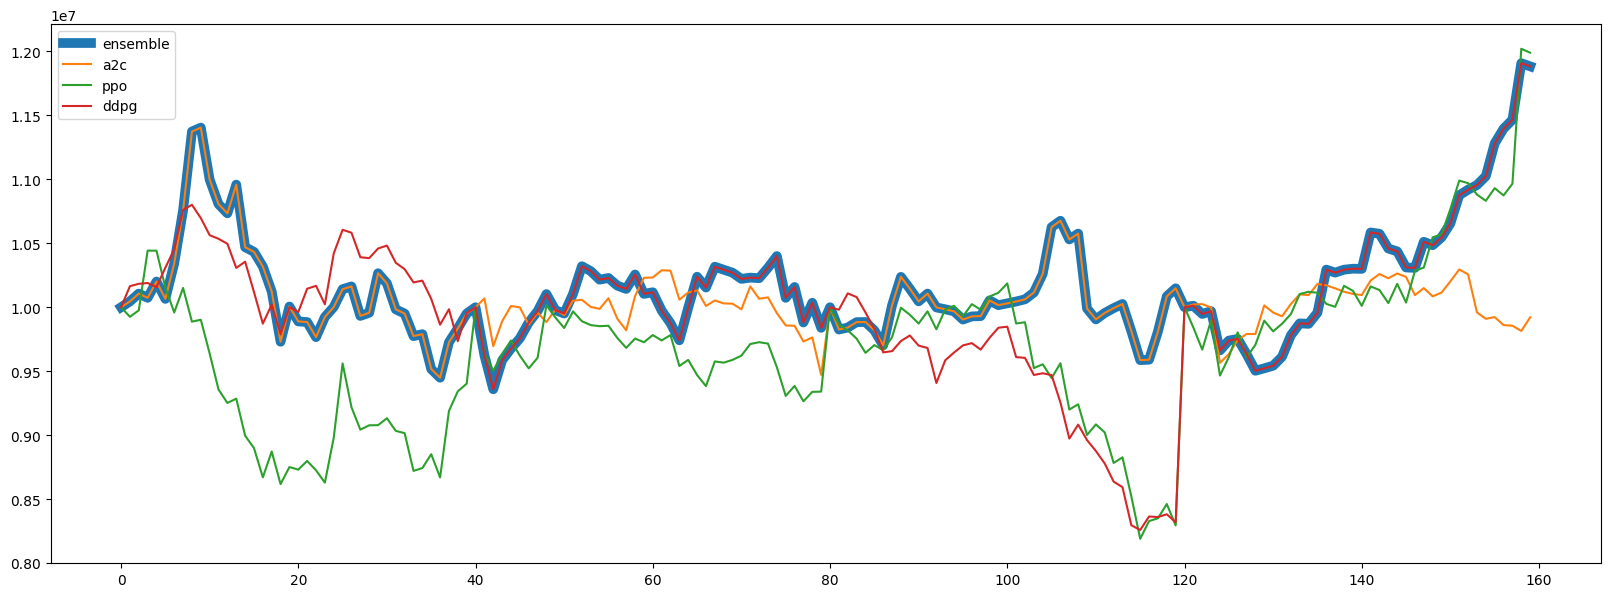

In [7]:
plt.figure(figsize=(20,7))
plt.plot(df_account_value.account_value, label='ensemble', linewidth=7)
plt.plot(df_account_value_a2c.account_value, label='a2c')
plt.plot(df_account_value_ppo.account_value, label='ppo')
plt.plot(df_account_value_ddpg.account_value, label='ddpg')

plt.legend()
plt.show()

<AxesSubplot:>

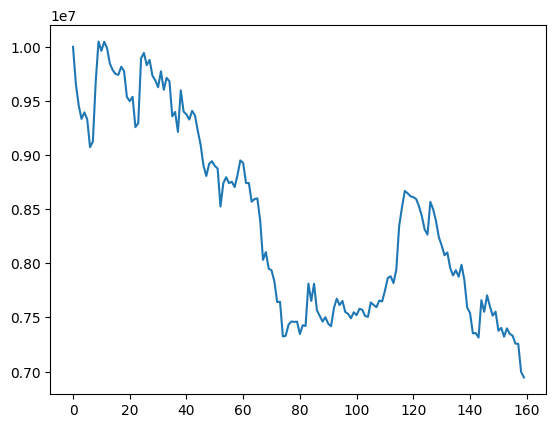

In [8]:
# 실제 trade
df_account_value_e=pd.DataFrame()
for idx, i in enumerate(range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window)):
    temp = pd.read_csv('results/account_value_trade_ensemble_{}.csv'.format(i))
    df_account_value_e = df_account_value_e.append(temp,ignore_index=True)
df_account_value_e=df_account_value_e.join(df_trade_date[validation_window:].reset_index(drop=True))
df_account_value_e.account_value.plot()